# GUIA 1 PDI

## Importamos librerias

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

importar carpeta de drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from IPython.display import display, Image

def cv2_imshow(img):
    # Encode image as JPEG
    _, buffer = cv2.imencode('.jpg', img)
    display(Image(data=buffer.tobytes()))

## EJERCICIO 1


1. Realice la carga y visualizacion de diferentes imagenes.

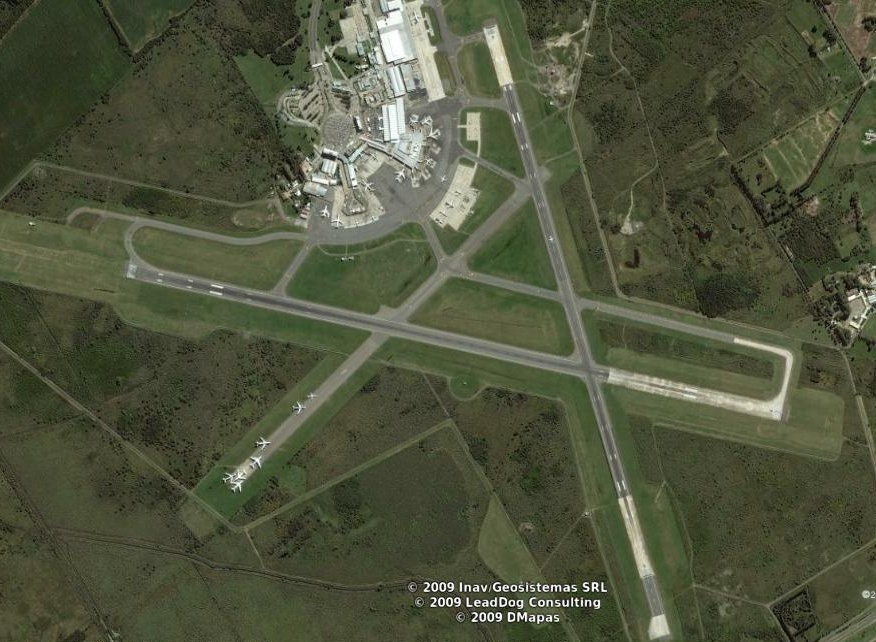

In [4]:
#cargamos la imagen
img_path = './imagenes/ezeiza1.jpg'
img = cv2.imread(img_path)
cv2_imshow(img)

2. Muestre en pantalla informacion sobre las imagenes.

In [5]:
print(f'Tipo de dato {type(img)}')
print(f'Tamanio de la imagen {img.shape}')
print(f'Tipo dato de la imagen {img.dtype}')

Tipo de dato <class 'numpy.ndarray'>
Tamanio de la imagen (642, 876, 3)
Tipo dato de la imagen uint8


3. Investigue los formatos la imagen y como leer y como escribir un valor puntual de la imagen.

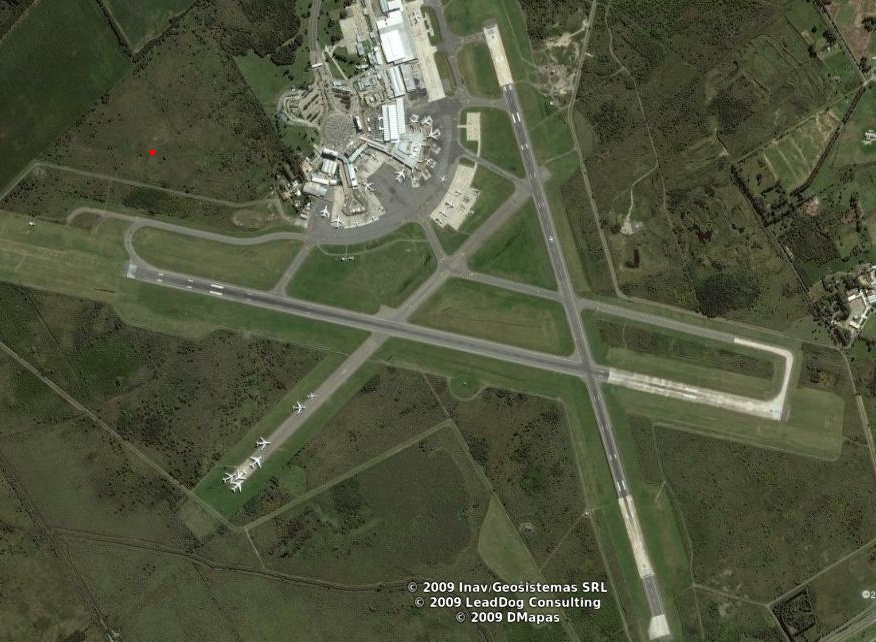

In [6]:
'''
FORMATOS DE IMAGENES COMPATIBLES CON OPENCV
| Formato  | Lectura  | Escritura | Notas                      |
|----------|----------|-----------|----------------------------|
| JPEG/JPG | ok       | ok        | Calidad ajustable (0-100)  |
| PNG      | ok       | ok        | Soporta transparencia      |
| TIFF     | ok       | ok        |       	                   |
| BMP      | ok       | ok        |       	                   |
| WebP	   | ok       | ok        | Depende de la compilación  |
| PGM/PPM  | ok       | ok        | Formatos Netpbm            |
| SR/RAS   | ok       | ok        | Sun Raster                 |
| DICOM	   | ok       | no        | Solo lectura               |
| GIF      | ok       | no        | Solo primer frame          |
| RAW      | no       | no        | Requiere conversión previa |
'''

# cambiamos el color de un segmento de pixeles (sobre la img orginal)
img[150:155, 150:155] = (0,0,255)
cv2_imshow(img)

4. Utilice el pasaje por parametros para especificar la imagen a cargar.

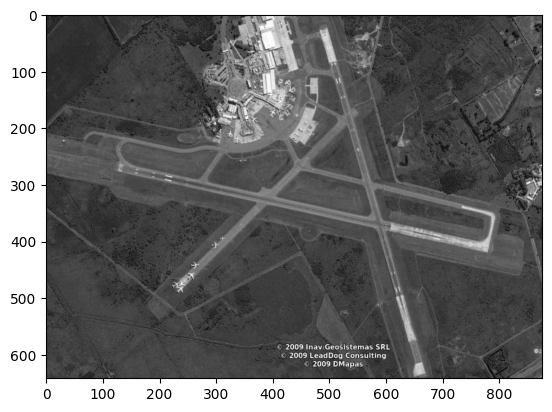

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')

5. Defina y recorte una subimagen de una imagen (vea ROI, Region Of Interest).

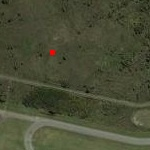

In [8]:
img3 = img.copy()[100:250,100:250]
cv2_imshow(img3)


6. Investigue y realice una funcion que le permita mostrar varias imagenes en una sola ventana.

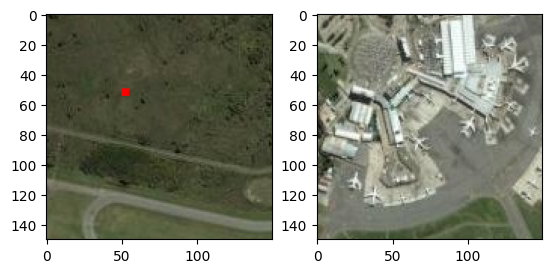

In [9]:
plt.figure()
plt.subplot(1,2,1)
# plt.imshow(img[100:250,100:250])
plt.imshow(cv2.cvtColor(img[100:250,100:250], cv2.COLOR_RGB2BGR))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img[100:250,300:450], cv2.COLOR_RGB2BGR))

7. Dibuje sobre la imagen lneas, crculos y rectangulos (opcional: de na la posicion en base al click del mouse).

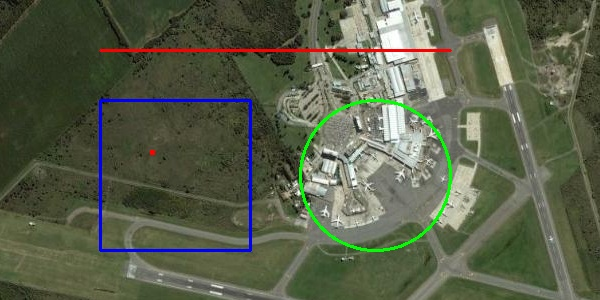

In [10]:
img_copy = img.copy()

cv2.line(img_copy,(100,50),(450,50), (0,0,250), 2)
cv2.rectangle(img_copy,(100,100),(250,250), (250,0,0), 2)
cv2.circle(img_copy, (375,175), 75, (0,255,0), 2)

cv2_imshow(img_copy[0:300, 0:600])

## EJERCICIO 2


1. Informe los valores de intensidad de puntos particulares de la imagen (opcional: determine la posicion en base al click del mouse).

In [11]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('./imagenes/ezeiza1.jpg', cv2.IMREAD_COLOR_BGR)

fil = 100  # fila a analizar
col = 100
intensidad = image[fil, col]

img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
intensidad2 = img_gray[fil,col]

print(f'intensidad (rgb): {intensidad}')
print(f'intensidad: {intensidad2}')

intensidad (rgb): [54 71 67]
intensidad: 65


2. Obtenga y grafique los valores de intensidad (perfil de intensidad) sobre una determinada fila o columna.

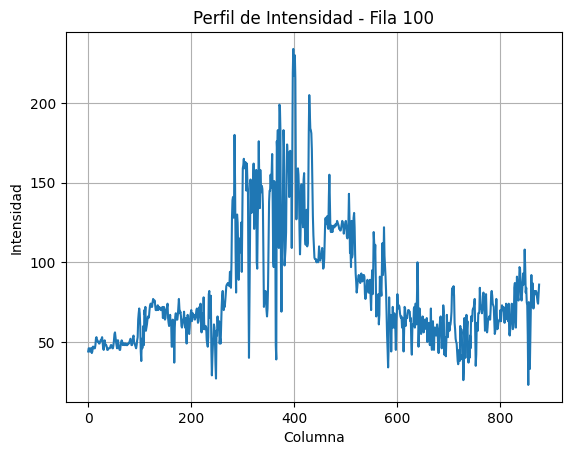

In [12]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('./imagenes/ezeiza1.jpg', cv2.IMREAD_GRAYSCALE)

fila = 100  # fila a analizar
perfil_fila = image[fila, :]

plt.figure()
plt.plot(perfil_fila)
plt.title(f'Perfil de Intensidad - Fila {fila}')
plt.xlabel('Columna')
plt.ylabel('Intensidad')
plt.grid(True)
plt.show()

3. Grafique el perfil de intensidad para un segmento de interes cualquiera.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.draw import line

image = io.imread('./imagenes/ezeiza1.jpg', as_gray=True)

def click_rectangle(event, x, y, flags, param):
    global pt
    if event == cv2.EVENT_LBUTTONDOWN:
        pt = [x,y]
    elif event == cv2.EVENT_LBUTTONUP:
        pt.append(x)
        pt.append(y)
        # linea arbitraria
        yy, xx = line(pt[1],pt[0],pt[3],pt[2])
        perfil = image.copy()[yy,xx]

        # dibujamos
        cv2.line(image, pt[0:2], pt[2:], (0,0,0), 2)
        cv2.imshow('draw rectangle', image)
        
        plt.plot(perfil)
        plt.show()


cv2.namedWindow('draw rectangle')
cv2.setMouseCallback('draw rectangle', click_rectangle)

while True:
    cv2.imshow('draw rectangle', image)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('c'):
        break



## EJERCICIO 3

Utilice las herramientas aprendidas en esta unidad para implementar un sistema que permita identificar una botella que no esta correctamente llena. 
Las imagenes que se proporcionaran son capturadas con una camara fija, en escala de grises y directamente de la linea de envasado. Para implementar el sistema debera bastarle una imagen de ejemplo botella.tif (que encontrara en el repositorio). Adicionalmente, se espera que el sistema pueda: 
1. identificar una botella no-llena en cualquier posicion de la imagen. 
2. indicar la posicion de la botella en la imagen (podra ser con un recuadro, informando la posicion relativa entre botellas, la posicion absoluta en pixels, etc).
3. informar el porcentaje de llenado de la botella no-llena.

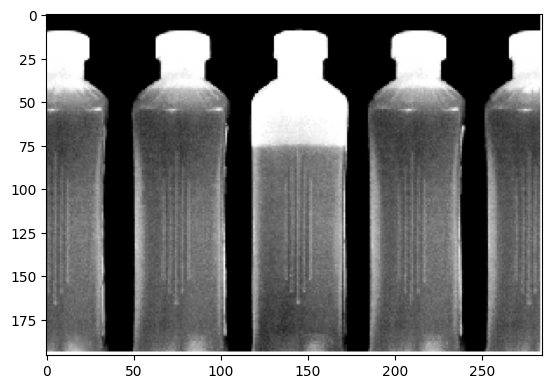

In [15]:
img3_path = './imagenes/botellas.tif'
img3 = cv2.imread(img3_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray')
plt.show()

116.47126623376623


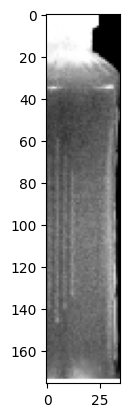

In [ ]:
H,W = img3.shape
bottle_w = 50
bottle_h = 176

botella = img3.copy()[ 20:, :35]
print(np.average(botella))
plt.imshow(botella, cmap='gray')
plt.show()

# bottle1 -> 116
# bottle2 -> 111
# bottle3 -> 135
# bottle4 -> 110
# bottle5 -> 102
